In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [2]:
#training Data Sets
train_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

train_solutions = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')

#Test Data Sets
test_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx')
test_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')

#train.drop_duplicates()

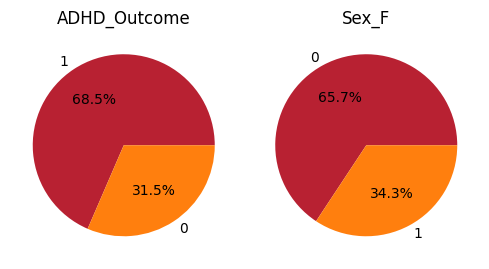

In [3]:
import matplotlib.pyplot as plt

# Define the target columns
target_columns = ['ADHD_Outcome', 'Sex_F']  # Update with actual column names if needed

# Create subplots for the two target variables
fig, axes = plt.subplots(1, 2, figsize=(5, 3))

for ax, col in zip(axes, target_columns):
    class_counts = train_solutions[col].value_counts(normalize=True) * 100  # Use the correct DataFrame
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#B82132', '#ff7f0e'])
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [3]:
#fill missing values
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)

test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
test_categorical['PreInt_Demos_Fam_Child_Race'].fillna(test_categorical['PreInt_Demos_Fam_Child_Race'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Edu'].fillna(test_categorical['Barratt_Barratt_P1_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Occ'].fillna(test_categorical['Barratt_Barratt_P1_Occ'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Edu'].fillna(test_categorical['Barratt_Barratt_P2_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Occ'].fillna(test_categorical['Barratt_Barratt_P2_Occ'].mode()[0], inplace=True)

train_quantitative['MRI_Track_Age_at_Scan'].fillna(train_quantitative['MRI_Track_Age_at_Scan'].median(), inplace=True)

test_quantitative['EHQ_EHQ_Total'].fillna(test_quantitative['EHQ_EHQ_Total'].median(), inplace=True)
test_quantitative['ColorVision_CV_Score'].fillna(test_quantitative['ColorVision_CV_Score'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_CP'].fillna(test_quantitative['APQ_P_APQ_P_CP'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_ID'].fillna(test_quantitative['APQ_P_APQ_P_ID'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_INV'].fillna(test_quantitative['APQ_P_APQ_P_INV'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_OPD'].fillna(test_quantitative['APQ_P_APQ_P_OPD'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PM'].fillna(test_quantitative['APQ_P_APQ_P_PM'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PP'].fillna(test_quantitative['APQ_P_APQ_P_PP'].median(), inplace=True)

test_quantitative['SDQ_SDQ_Conduct_Problems'].fillna(test_quantitative['SDQ_SDQ_Conduct_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Difficulties_Total'].fillna(test_quantitative['SDQ_SDQ_Difficulties_Total'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Emotional_Problems'].fillna(test_quantitative['SDQ_SDQ_Emotional_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Externalizing'].fillna(test_quantitative['SDQ_SDQ_Externalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Generating_Impact'].fillna(test_quantitative['SDQ_SDQ_Generating_Impact'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Hyperactivity'].fillna(test_quantitative['SDQ_SDQ_Hyperactivity'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Internalizing'].fillna(test_quantitative['SDQ_SDQ_Internalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Peer_Problems'].fillna(test_quantitative['SDQ_SDQ_Peer_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Prosocial'].fillna(test_quantitative['SDQ_SDQ_Prosocial'].median(), inplace=True)

<ipython-input-3-322137524484>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
<ipython-input-3-322137524484>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

***Train Categorical - Feature Engineering***

In [12]:
train_categorical.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.420445,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.685525,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

def plot_categorical_vs_target(df, cat_cols, target_cols):
    for target in target_cols:
        for cat in cat_cols:
            plt.figure(figsize=(5, 3))
            
            sns.countplot(x=cat, hue=target, data=df)  # Group by target variable
            plt.title(f"{cat} vs {target}")
            plt.xticks(rotation=45)
            plt.legend(title=target)
            plt.show()


In [7]:
#for the get insights from the train categorical values
merged_df = pd.merge(train_categorical, train_solutions, on='participant_id', how='inner')

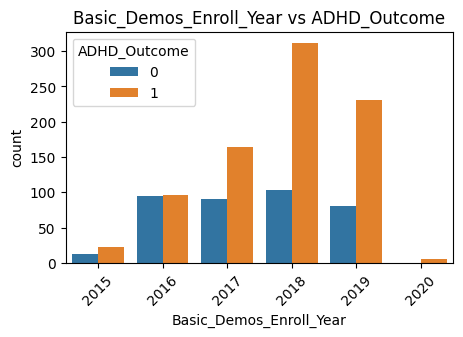

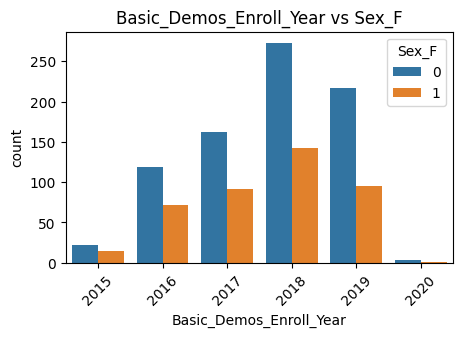

In [8]:
cat_cols=['Basic_Demos_Enroll_Year']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)


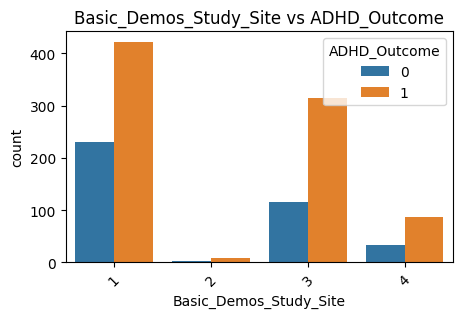

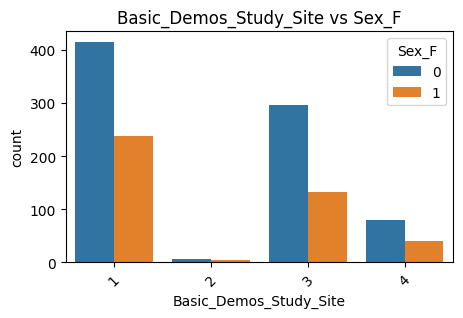

In [31]:
cat_cols=['Basic_Demos_Study_Site']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

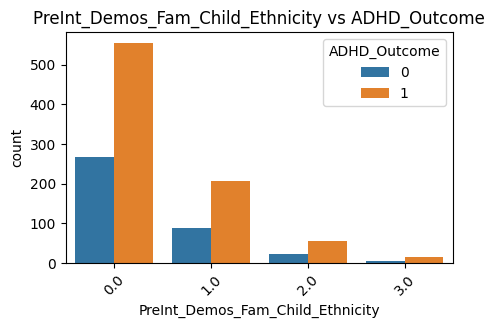

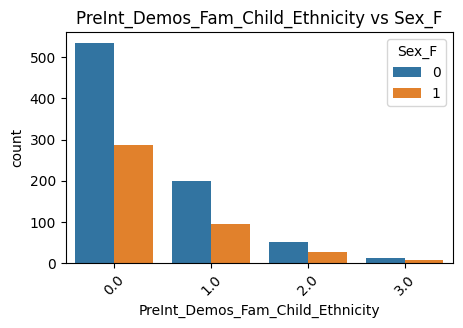

In [32]:
cat_cols=['PreInt_Demos_Fam_Child_Ethnicity']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

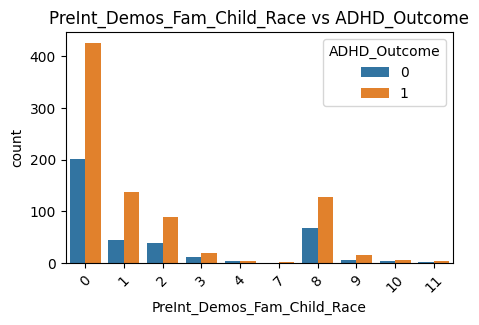

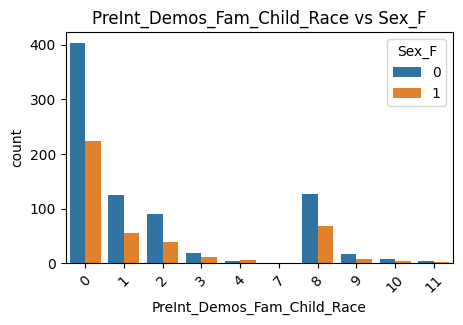

In [40]:
cat_cols=['PreInt_Demos_Fam_Child_Race']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

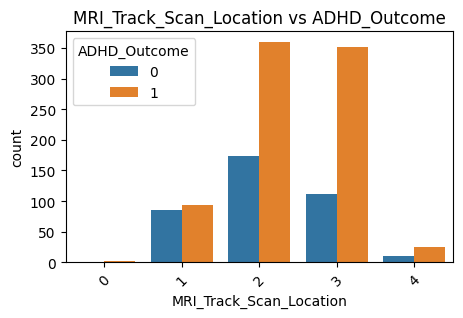

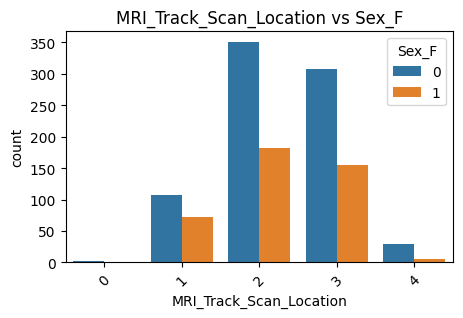

In [41]:
cat_cols=['MRI_Track_Scan_Location']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

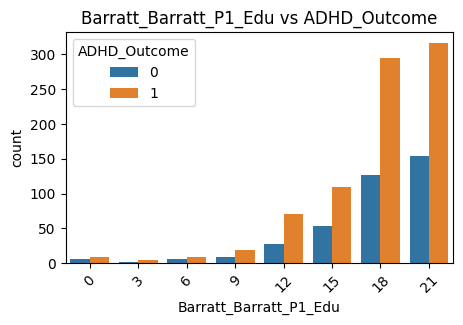

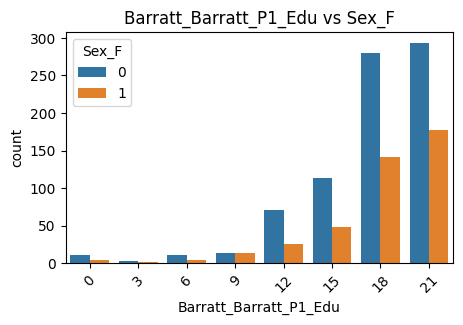

In [42]:
cat_cols=['Barratt_Barratt_P1_Edu']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

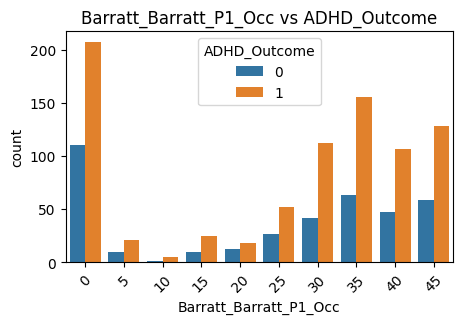

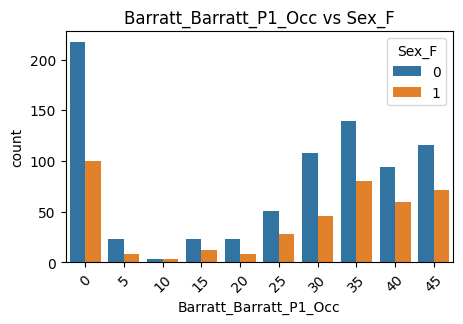

In [43]:
cat_cols=['Barratt_Barratt_P1_Occ']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

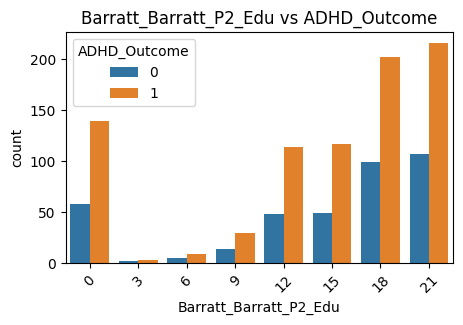

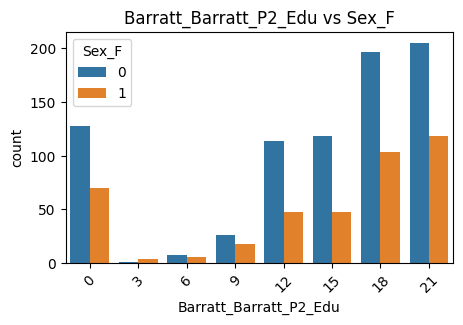

In [44]:
cat_cols=['Barratt_Barratt_P2_Edu']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

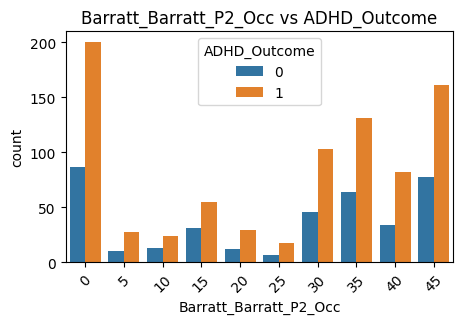

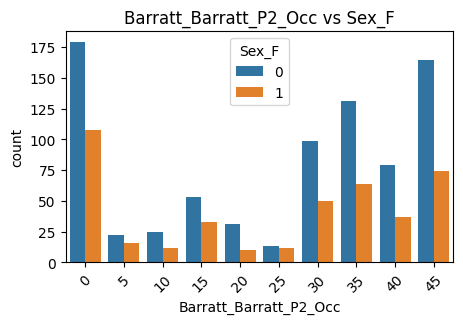

In [46]:
cat_cols=['Barratt_Barratt_P2_Occ']
target_columns = ['ADHD_Outcome', 'Sex_F'] 
plot_categorical_vs_target(merged_df, cat_cols, target_columns)

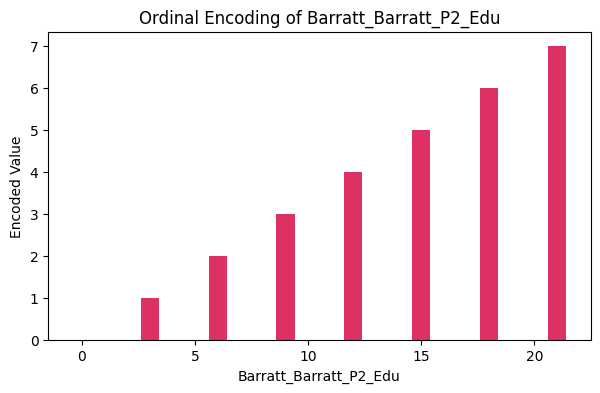

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

merged_df['Encoded_Barratt_Barratt_P2_Edu'] = ordinal_encoder.fit_transform(merged_df[['Barratt_Barratt_P2_Edu']])

# Plotting the encoded values
plt.figure(figsize=(7, 4))
plt.bar(merged_df['Barratt_Barratt_P2_Edu'], merged_df['Encoded_Barratt_Barratt_P2_Edu'], color='#DE3163')
plt.xlabel('Barratt_Barratt_P2_Edu')
plt.ylabel('Encoded Value')
plt.title('Ordinal Encoding of Barratt_Barratt_P2_Edu')
plt.show()


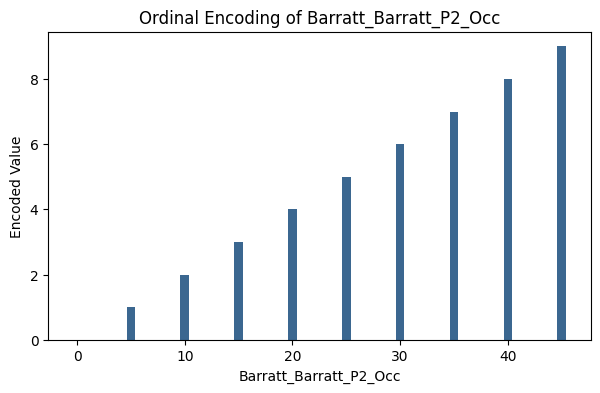

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

merged_df['Encoded_Barratt_Barratt_P2_Occ'] = ordinal_encoder.fit_transform(merged_df[['Barratt_Barratt_P2_Occ']])

# Plotting the encoded values
plt.figure(figsize=(7, 4))
plt.bar(merged_df['Barratt_Barratt_P2_Occ'], merged_df['Encoded_Barratt_Barratt_P2_Occ'], color='#3B6790')
plt.xlabel('Barratt_Barratt_P2_Occ')
plt.ylabel('Encoded Value')
plt.title('Ordinal Encoding of Barratt_Barratt_P2_Occ')
plt.show()

**need ordinal Encoding**

    *Encoded_Barratt_Barratt_P2_Edu
    *Encoded_Barratt_Barratt_P2_Occ
    *Encoded_Barratt_Barratt_P1_Occ
    *Basic_Demos_Study_Site
    *PreInt_Demos_Fam_Child_Race

In [10]:
#Ordinal Encoding for categorical Variables
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Define the columns that need ordinal encoding
ordinal_columns = [
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ',
    'Barratt_Barratt_P1_Occ',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Race'
]

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding and replace the original columns
train_categorical[ordinal_columns] = ordinal_encoder.fit_transform(train_categorical[ordinal_columns])

# Convert back to DataFrame to maintain column names
train_categorical[ordinal_columns] = train_categorical[ordinal_columns].astype(int)  # Convert to integer values

# Display the updated DataFrame
#print(train_categorical.head())


In [11]:
#Parental Education level 
train_categorical['Avg_Parent_Edu'] = (train_categorical['Barratt_Barratt_P1_Edu'] + train_categorical['Barratt_Barratt_P2_Edu']) / 2

#Parental Occupation Level
train_categorical['Occ_level'] = (train_categorical['Barratt_Barratt_P1_Occ'] + train_categorical['Barratt_Barratt_P2_Occ']) 


In [12]:
#divide into categories of Parental Education level
def classify_edu(value):
    if value < 5:
        return 1
    elif 5 <= value < 10:
        return 2
    elif 10 <= value < 15:
        return 3
    else:
        return 4

train_categorical['Parent_Edu_Class'] = train_categorical['Avg_Parent_Edu'].apply(classify_edu)


In [13]:
#divide into categories of Parental Education level
def classify_Occ(value):
    if value<30:
        return 1
    elif 30<=value<60:
        return 2
    else:
        return 3

train_categorical['Parental_Occ_Class']=train_categorical['Occ_level'].apply(classify_Occ)

In [14]:
train_categorical

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Avg_Parent_Edu,Occ_level,Parent_Edu_Class,Parental_Occ_Class
0,UmrK0vMLopoR,2016,0,0.0,0,1,21,9,7,9,14.0,18,3,1
1,CPaeQkhcjg7d,2019,2,1.0,2,3,15,3,0,0,7.5,3,2,1
2,Nb4EetVPm3gs,2016,0,1.0,6,1,18,8,0,0,9.0,8,2,1
3,p4vPhVu91o4b,2018,2,0.0,6,3,15,6,6,0,10.5,6,3,1
4,M09PXs7arQ5E,2019,2,0.0,1,3,15,4,0,0,7.5,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,0,0.0,0,2,21,8,7,8,14.0,16,3,1
1209,groSbUfkQngM,2016,0,0.0,0,1,18,7,0,0,9.0,7,2,1
1210,zmxGvIrOD0bt,2015,0,1.0,2,1,18,4,0,0,9.0,4,2,1
1211,rOmWFuJCud5G,2018,2,0.0,6,3,21,8,6,9,13.5,17,3,1


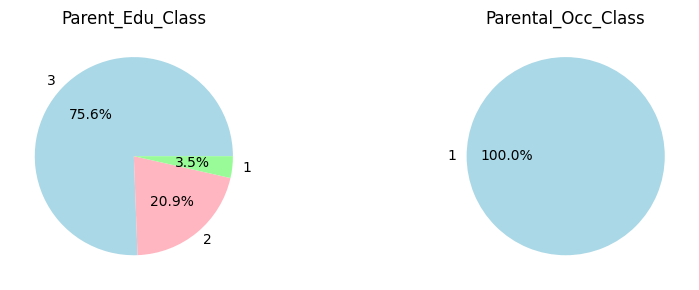

In [15]:
import matplotlib.pyplot as plt

# Define the new set of target columns
new_target_columns = ['Parent_Edu_Class','Parental_Occ_Class']  # Replace with desired columns

# Create subplots dynamically based on the number of columns
fig, axes = plt.subplots(1, len(new_target_columns), figsize=(5 * len(new_target_columns), 3))

# Ensure axes is iterable (needed if only one column is provided)
if len(new_target_columns) == 1:
    axes = [axes]

# Plot pie charts for each selected column
for ax, col in zip(axes, new_target_columns):
    class_counts = train_categorical[col].value_counts(normalize=True) * 100  # Adjust DataFrame name if needed
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=[ '#AAD8E6', '#FFB6C1','#98FB98','#FFFACD'])
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [18]:
###### for target = ADHD_Outcome

from sklearn.feature_selection import chi2, SelectKBest

# Assuming 'X_categorical' contains categorical features and 'y' is the target variable
y=train_solutions['ADHD_Outcome']
X_train_categorical=train_categorical.drop(columns=['participant_id'])
#X_categorical_encoded = pd.get_dummies(X_categorical)  # One-hot encoding
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Adjust 'k' as needed
chi2_selector.fit(X_train_categorical, y)

# Get the scores
chi2_scores = pd.Series(chi2_selector.scores_, index=X_train_categorical.columns)
selected_categorical_features = chi2_scores.nlargest(10).index  # Keeping top 15 features

train_categorical_selected = X_train_categorical[selected_categorical_features]


In [20]:
train_categorical_selected.columns

Index(['Basic_Demos_Study_Site', 'MRI_Track_Scan_Location',
       'Barratt_Barratt_P1_Occ', 'PreInt_Demos_Fam_Child_Race',
       'PreInt_Demos_Fam_Child_Ethnicity', 'Barratt_Barratt_P2_Edu',
       'Occ_level', 'Barratt_Barratt_P2_Occ', 'Avg_Parent_Edu',
       'Parent_Edu_Class'],
      dtype='object')

In [23]:
###### for target = Sex_F

from sklearn.feature_selection import chi2, SelectKBest

# Assuming 'X_categorical' contains categorical features and 'y' is the target variable
y=train_solutions['Sex_F']
X2_train_categorical=train_categorical.drop(columns=['participant_id'])
#X_categorical_encoded = pd.get_dummies(X_categorical)  # One-hot encoding
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Adjust 'k' as needed
chi2_selector.fit(X2_train_categorical, y)

# Get the scores
chi2_scores = pd.Series(chi2_selector.scores_, index=X2_train_categorical.columns)
selected2_categorical_features = chi2_scores.nlargest(10).index  # Keeping top 15 features

train2_categorical_selected = X2_train_categorical[selected2_categorical_features]


In [24]:
train2_categorical_selected.columns

Index(['Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P1_Occ',
       'Basic_Demos_Study_Site', 'Barratt_Barratt_P1_Edu',
       'MRI_Track_Scan_Location', 'Avg_Parent_Edu',
       'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity',
       'Barratt_Barratt_P2_Edu', 'Parent_Edu_Class'],
      dtype='object')

In [ ]:
#new_df_categorical = pd.concat([train_categorical, test_categorical], axis =0)

***Train Quantitative - Feature Engineering***

In [41]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,new_APQ_P_APQ_P_CP,new_APQ_P_APQ_P_PP,new_SDQ_SDQ_Conduct_Problems,new_SDQ_SDQ_Emotional_Problems
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,...,4.073372,5.497939,4.565540,2.258038,7.683430,11.095369,1.856214,3.237698,0.895351,0.971893
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,...,2.819731,2.836764,3.519634,2.090414,2.190295,2.721666,0.396707,0.345363,0.682574,0.690017
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,...,2.000000,4.000000,2.000000,0.000000,6.000000,9.583960,1.643721,3.178054,0.000000,0.693147
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,...,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219,1.643721,3.295837,1.098612,1.098612
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,...,6.000000,8.000000,7.000000,4.000000,10.000000,11.966005,1.963018,3.367296,1.386294,1.609438
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,...,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453,3.540423,3.433987,2.397895,2.397895


In [40]:
train_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

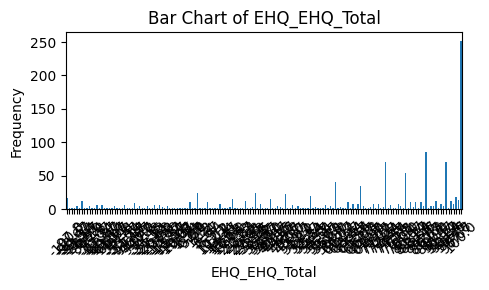

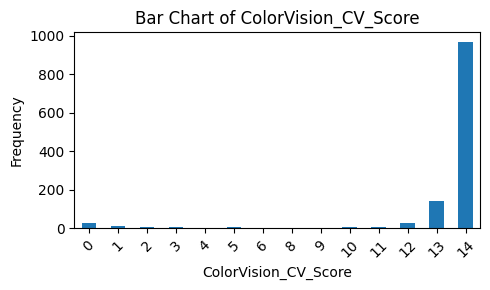

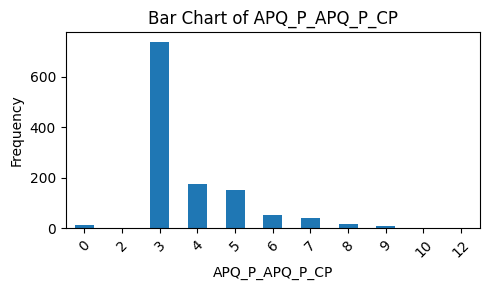

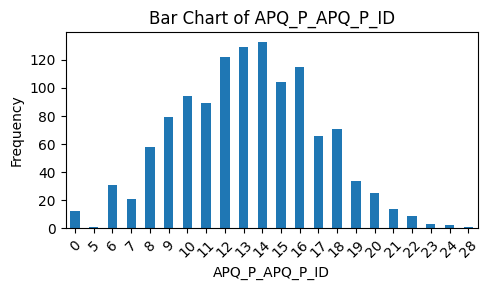

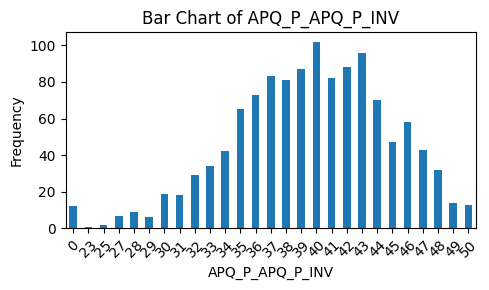

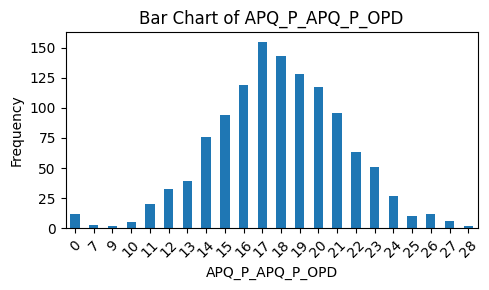

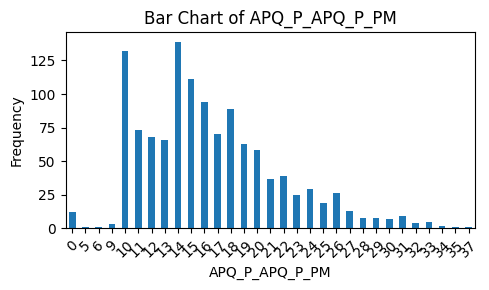

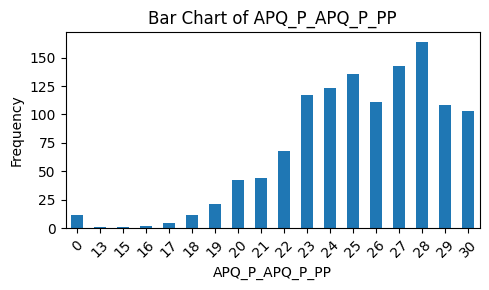

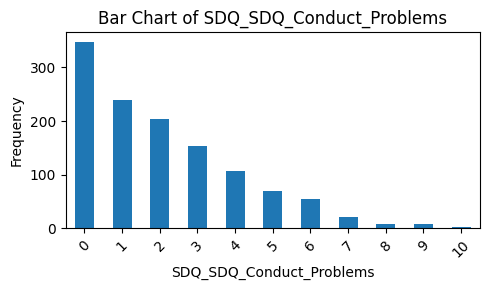

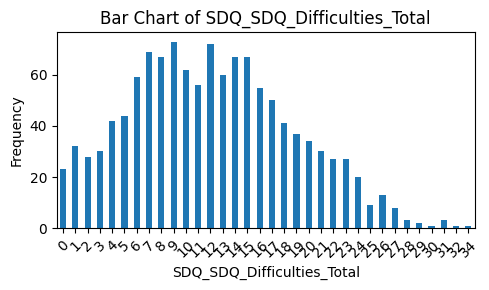

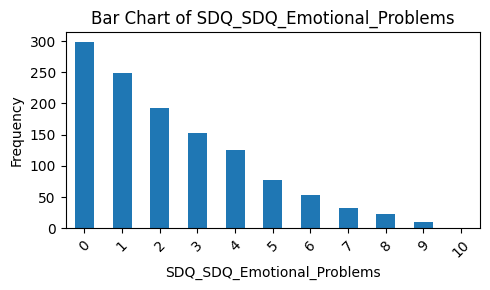

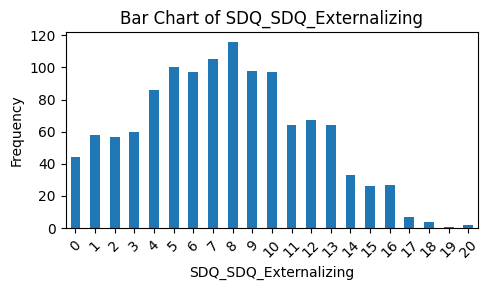

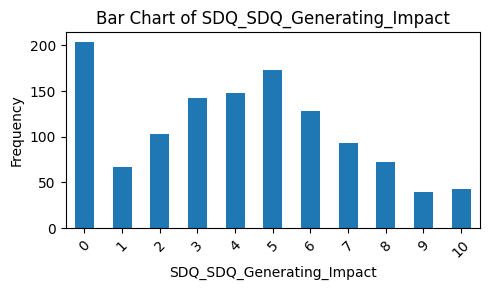

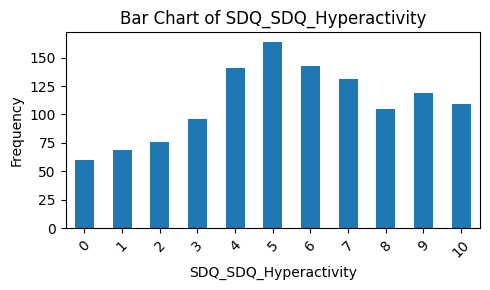

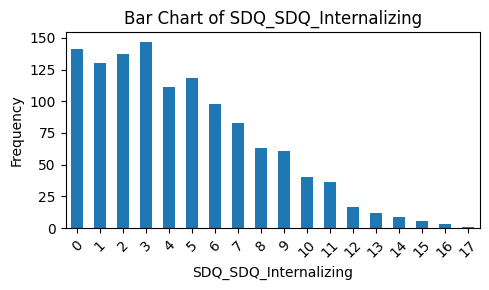

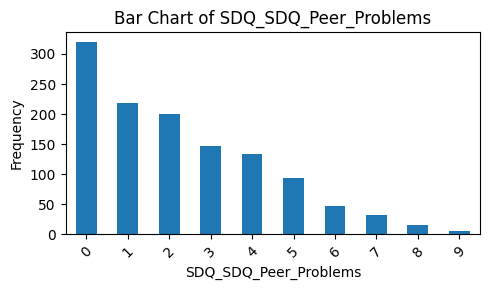

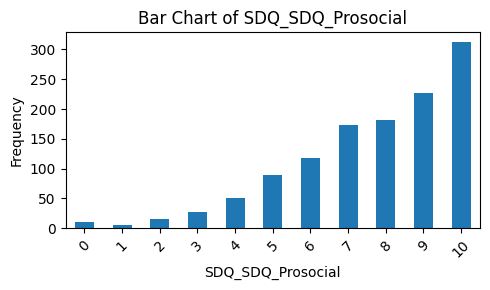

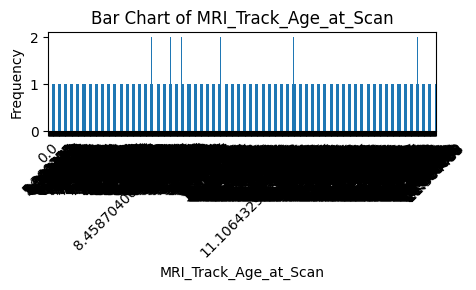

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = [
    'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'
]

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [43]:
def classify_EHQ(value):
    if value<10:
        return 1
    elif 10<=value<20:
        return 2
    elif 20<=value<30:
        return 3
    elif 30<=value<40:
        return 4
    elif 40<=value<50:
        return 5
    elif 50<=value<60:
        return 6
    elif 60<=value<70:
        return 7
    elif 70<=value<80:
        return 8
    elif 80<=value<90:
        return 9
    else:
        return 10

train_quantitative['new_EHQ_EHQ_Total']=train_quantitative['EHQ_EHQ_Total'].apply(classify_EHQ)

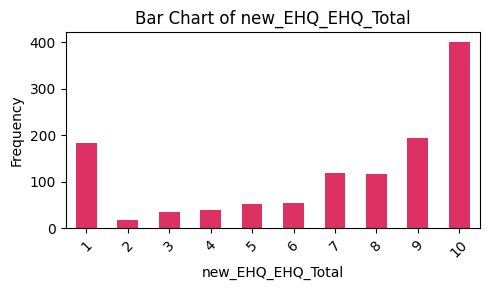

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['new_EHQ_EHQ_Total']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color="#DE3163")
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [12]:
import numpy as np

#train_quantitative['new_ColorVision_CV_Score'] = np.log1p(train_quantitative['ColorVision_CV_Score'])  # Adds 1 to avoid log(0)

# Define your bins and labels
bins = [0, 7, 14]  # Adjusting for the 0-14 range
labels = ['Low', 'High']  # You can change these labels as per your requirement

# Assuming 'df' is your DataFrame
train_quantitative['new_ColorVision_CV_Score']= pd.cut(train_quantitative['ColorVision_CV_Score'], bins=bins, labels=labels)

# Check the result
#print(train_quantitative[['EHQ_EHQ_Total', 'EHQ_EHQ_Total_binned']])



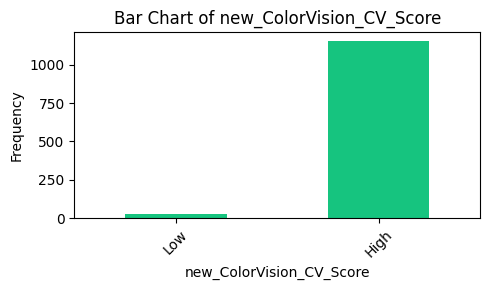

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['new_ColorVision_CV_Score']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#16C47F')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
train_quantitative['APQ_P_APQ_P_CP'].value_counts()

APQ_P_APQ_P_CP
3     740
4     177
5     154
6      54
7      42
8      18
0      12
9      11
2       3
12      1
10      1
Name: count, dtype: int64

In [16]:
#train_quantitative['new_APQ_P_APQ_P_CP'] = np.log(train_quantitative['APQ_P_APQ_P_CP'])
#from scipy.stats import boxcox, yeojohnson

#train_quantitative["new_APQ_P_APQ_P_CP"], _ = yeojohnson(train_quantitative["APQ_P_APQ_P_CP"])


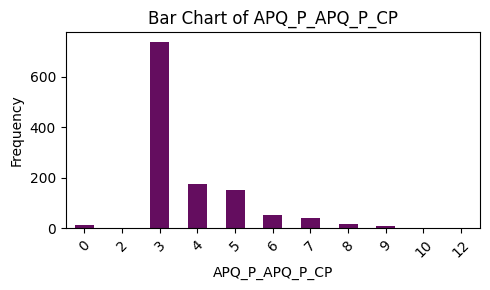

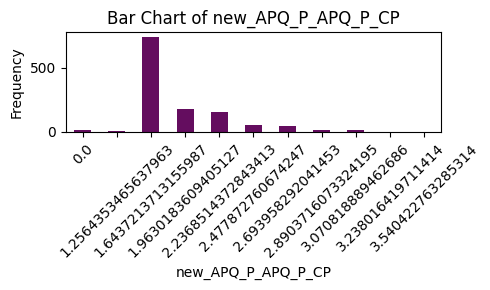

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['APQ_P_APQ_P_CP','new_APQ_P_APQ_P_CP']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#640D5F')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
train_quantitative['new_APQ_P_APQ_P_PP'] = np.log1p(train_quantitative['APQ_P_APQ_P_PP'])


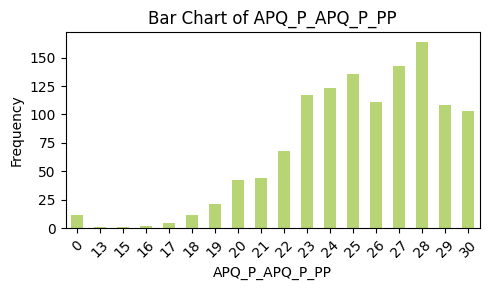

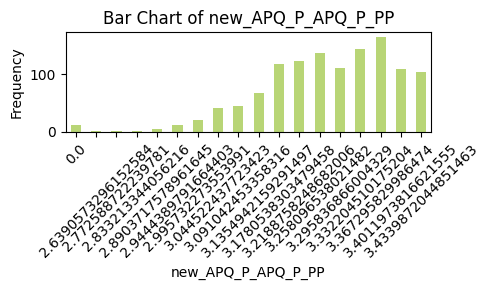

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['APQ_P_APQ_P_PP','new_APQ_P_APQ_P_PP']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#B8D576')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [22]:
#SDQ_SDQ_Conduct_Problems
train_quantitative['new_SDQ_SDQ_Conduct_Problems'] = np.log1p(train_quantitative['SDQ_SDQ_Conduct_Problems'])


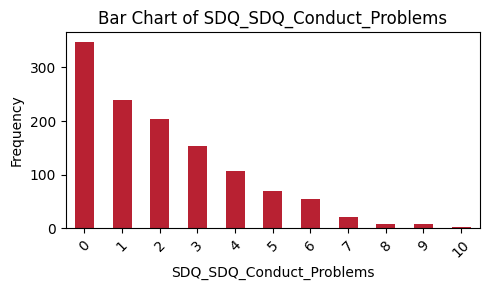

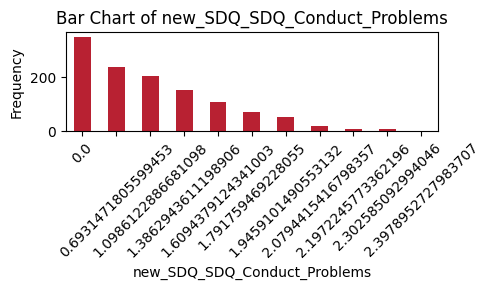

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['SDQ_SDQ_Conduct_Problems','new_SDQ_SDQ_Conduct_Problems']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#B82132')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [33]:
train_quantitative['new_SDQ_SDQ_Emotional_Problems'] = np.log1p(train_quantitative['SDQ_SDQ_Emotional_Problems'])


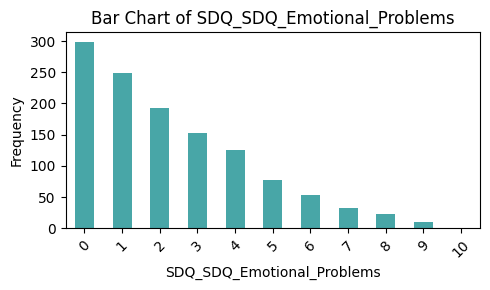

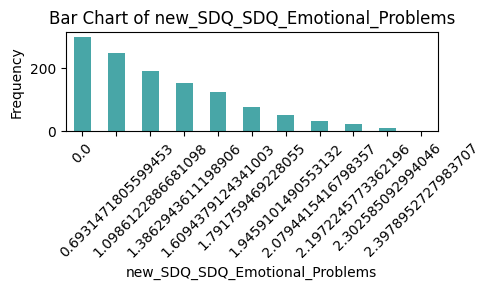

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['SDQ_SDQ_Emotional_Problems','new_SDQ_SDQ_Emotional_Problems']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#48A6A7')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

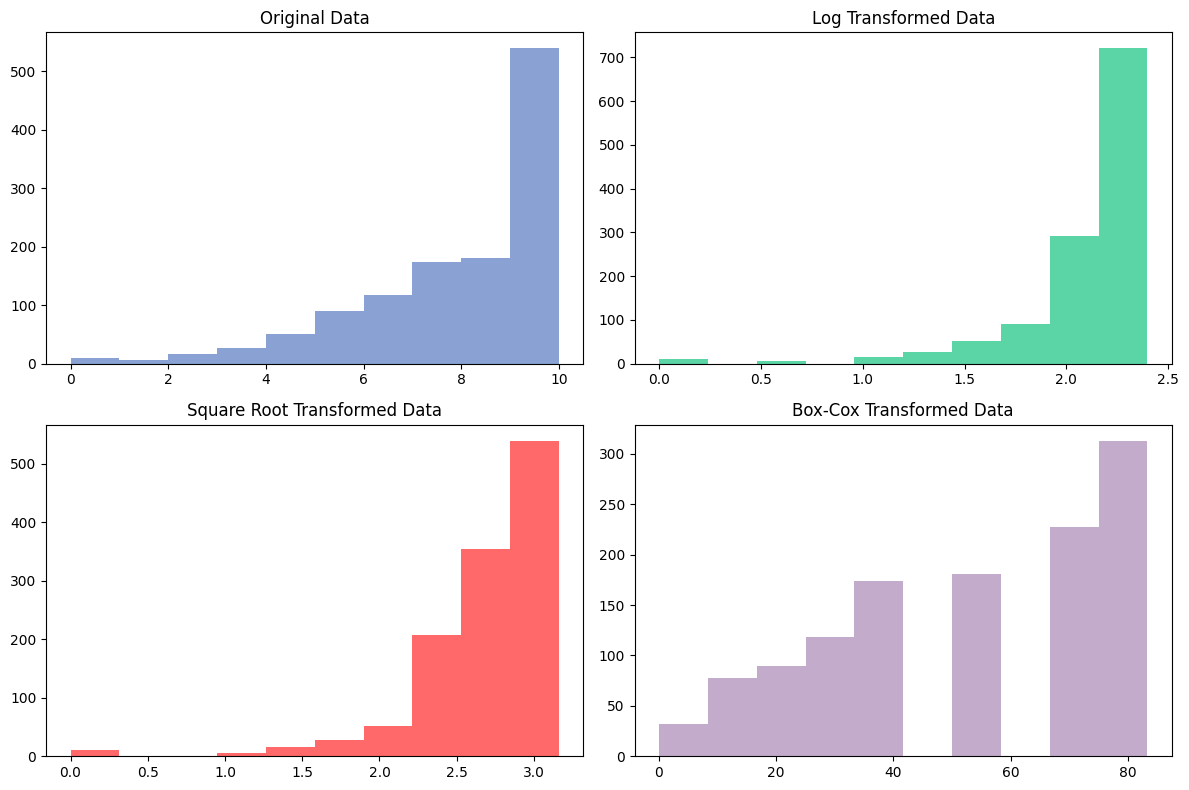

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example left-skewed data - prosocial
data = train_quantitative['SDQ_SDQ_Prosocial']

# Square root transformation
sqrt_transformed = np.sqrt(data)

# Shifted data for Box-Cox transformation
data_shifted = data + 1  # Ensure all values are positive

# Apply Box-Cox transformation
boxcox_transformed, _ = stats.boxcox(data_shifted)

# Log transformation (adding 1 to handle zero values)
log_transformed = np.log(data + 1)

# Plot the original and transformed data
plt.figure(figsize=(12, 8))  # Increased figure size for clarity

# Plot original data
plt.subplot(2, 2, 1)
plt.hist(data, bins=10, color='#577BC1', alpha=0.7)
plt.title('Original Data')

# Plot log transformed data
plt.subplot(2, 2, 2)
plt.hist(log_transformed, bins=10, color='#16C47F', alpha=0.7)
plt.title('Log Transformed Data')

# Plot square root transformed data
plt.subplot(2, 2, 3)
plt.hist(sqrt_transformed, bins=10, color='#FF2929', alpha=0.7)
plt.title('Square Root Transformed Data')

# Plot Box-Cox transformed data
plt.subplot(2, 2, 4)
plt.hist(boxcox_transformed, bins=10, color='#A888B5', alpha=0.7)
plt.title('Box-Cox Transformed Data')                                 # this one is good ✅

plt.tight_layout()  # Adjust spacing between plots for better clarity
plt.show()


In [42]:
train_quantitative['MRI_Track_Age_at_Scan'].value_counts()

MRI_Track_Age_at_Scan
10.739219    361
9.975245       2
17.263746      2
10.410563      2
9.512890       2
            ... 
7.541524       1
7.443531       1
7.538558       1
9.775610       1
12.595710      1
Name: count, Length: 838, dtype: int64

In [47]:
def classify_MRI_Age(value):
    if value<2:
        return 1
    elif 2<=value<4:
        return 2
    elif 4<=value<6:
        return 3
    elif 6<=value<8:
        return 4
    elif 8<=value<10:
        return 5
    elif 10<=value<12:
        return 6
    elif 12<=value<14:
        return 7
    elif 14<=value<16:
        return 8
    elif 16<=value<18:
        return 9
    else:
        return 10

train_quantitative['new_MRI_Track_Age_at_Scan']=train_quantitative['MRI_Track_Age_at_Scan'].apply(classify_MRI_Age)

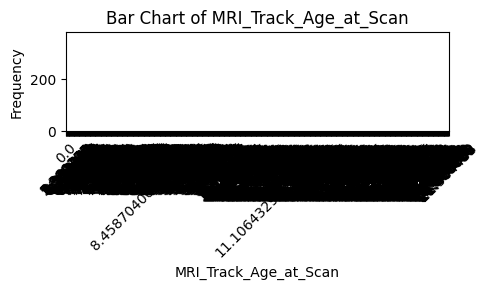

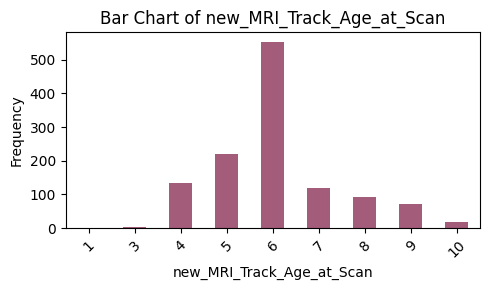

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = ['MRI_Track_Age_at_Scan','new_MRI_Track_Age_at_Scan']

# Plotting bar charts for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_quantitative[column].value_counts().sort_index().plot(kind='bar',color='#A35C7A')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

*Need One Hot Encoding for*

    new_ColorVision_CV_Score
    APQ_P_APQ_P_CP

In [ ]:
#feature Engineering

In [58]:
train_quantitative

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,new_APQ_P_APQ_P_CP,new_APQ_P_APQ_P_PP,new_SDQ_SDQ_Conduct_Problems,new_SDQ_SDQ_Emotional_Problems,new_EHQ_EHQ_Total,new_MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,0,10,10.739219,1.643721,3.367296,0.000000,0.693147,5,6
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,10,4,5,10.739219,1.643721,3.433987,0.000000,1.945910,1,6
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,6,4,9,8.239904,1.963018,3.401197,0.693147,1.098612,1,5
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,8,4,6,10.739219,2.236851,3.367296,1.945910,1.609438,1,6
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,7,3,9,8.940679,2.236851,3.367296,0.693147,1.609438,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,...,2,0,9,10.697923,2.236851,3.091042,0.693147,1.098612,9,6
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,...,7,4,7,13.964750,1.643721,3.178054,1.945910,1.386294,8,7
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,...,1,0,10,10.739219,1.643721,3.332205,1.386294,0.693147,2,6
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,...,0,0,9,12.089094,1.643721,3.178054,1.609438,0.000000,6,7


In [28]:
######### for Target = ADHD Outcome
from sklearn.feature_selection import mutual_info_regression

y=train_solutions['ADHD_Outcome']
X_train_quantitative=train_quantitative.drop(columns=['participant_id'])

mi_scores = mutual_info_regression(X_train_quantitative, y)
mi_scores = pd.Series(mi_scores, index=X_train_quantitative.columns)
selected_numerical_features = mi_scores.nlargest(15).index  # Keep top 8

X_numerical_selected = X_train_quantitative[selected_numerical_features]

print(X_numerical_selected.columns)

Index(['SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Internalizing', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Prosocial', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'SDQ_SDQ_Peer_Problems', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_ID',
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_PM'],
      dtype='object')


In [29]:
####### for Target = Sex_F
from sklearn.feature_selection import mutual_info_regression

y=train_solutions['Sex_F']
X2_train_quantitative=train_quantitative.drop(columns=['participant_id'])

mi_scores = mutual_info_regression(X2_train_quantitative, y)
mi_scores = pd.Series(mi_scores, index=X2_train_quantitative.columns)
selected2_numerical_features = mi_scores.nlargest(15).index  # Keep top 8

X2_numerical_selected = X2_train_quantitative[selected2_numerical_features]

print(X2_numerical_selected.columns)

Index(['SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Prosocial', 'EHQ_EHQ_Total', 'SDQ_SDQ_Difficulties_Total',
       'APQ_P_APQ_P_PP', 'APQ_P_APQ_P_ID', 'SDQ_SDQ_Peer_Problems',
       'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Generating_Impact'],
      dtype='object')


***Train_functional Feature Engineering***

In [14]:
train_functional

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,kTurROKp5YHQ,0.022932,0.024830,-0.006514,0.021070,0.093365,0.083369,0.010991,0.035838,0.023909,...,0.060060,-0.003911,-0.016413,0.089110,0.118587,-0.060868,0.124443,0.028510,0.113064,0.103809
1209,FCRyMz9O6yCq,0.047078,0.135955,0.144366,0.054938,0.065760,0.113550,0.032621,0.025349,0.011848,...,0.021318,0.020141,-0.020920,0.030450,0.190241,0.026461,-0.011593,0.139483,-0.064480,0.070354
1210,vm2P1hmAY1hl,0.094541,0.145280,0.061964,0.030562,0.078278,0.105857,0.043984,0.039145,0.032024,...,-0.052990,-0.002118,-0.038452,0.066608,0.143446,0.051221,0.127495,0.106242,-0.036065,0.151341
1211,OFxvN8lnw21w,-0.001533,0.128562,0.045000,-0.008742,0.003673,0.086494,0.090101,-0.037449,-0.026334,...,0.024479,-0.036995,-0.061617,-0.001699,0.106568,0.023427,-0.003520,0.174972,0.041198,0.152029


In [61]:
train_functional.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


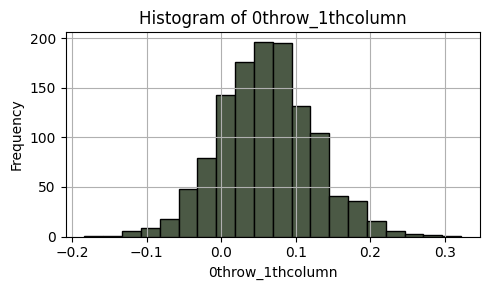

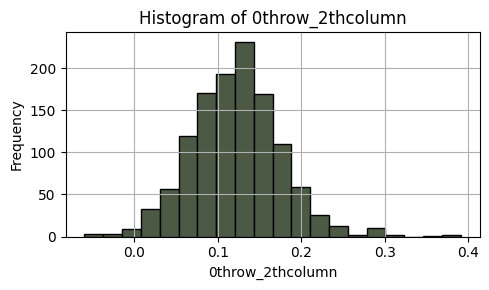

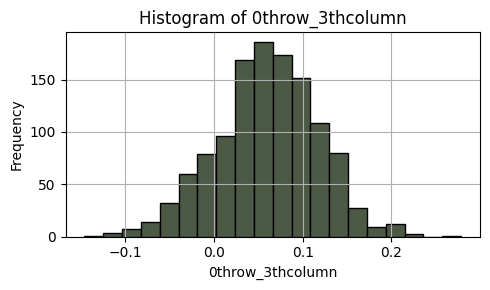

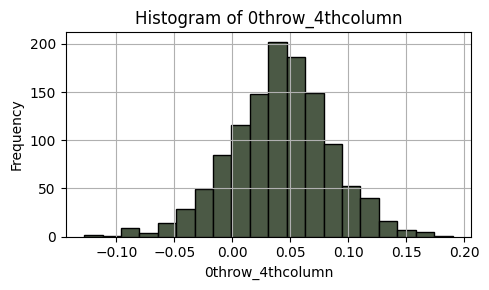

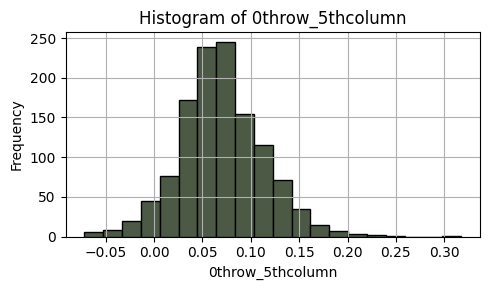

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = [
    '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn'
]

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_functional[column].hist(bins=20, color='#4B5945', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


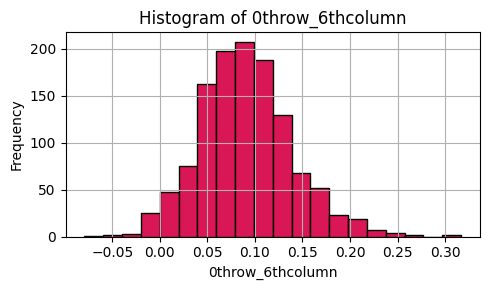

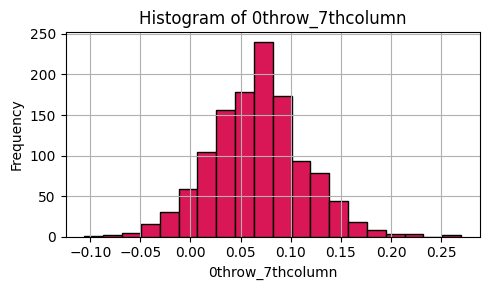

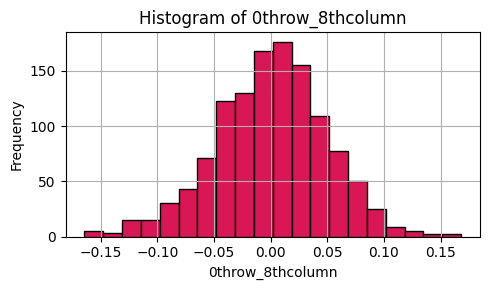

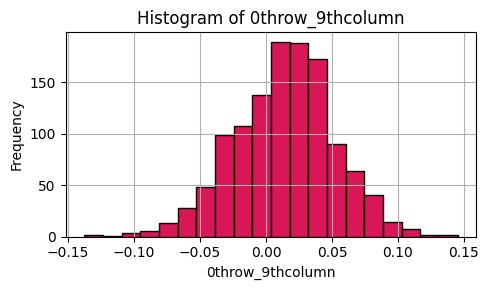

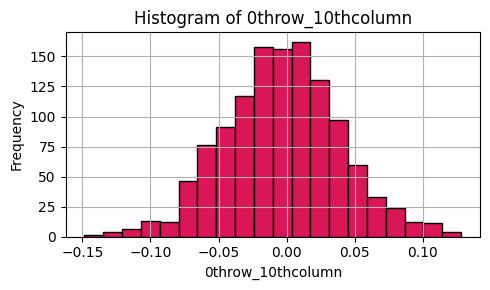

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = [
    '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn', '0throw_9thcolumn', '0throw_10thcolumn'
]

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_functional[column].hist(bins=20, color='#D91656', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


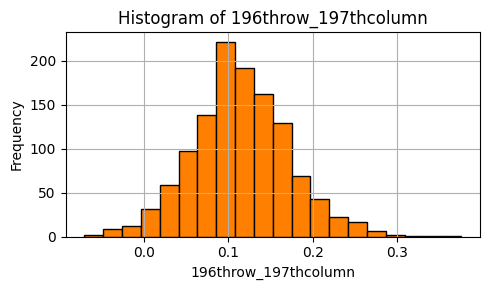

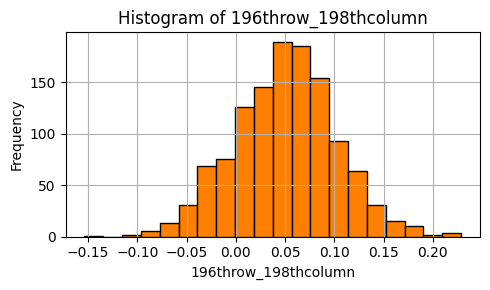

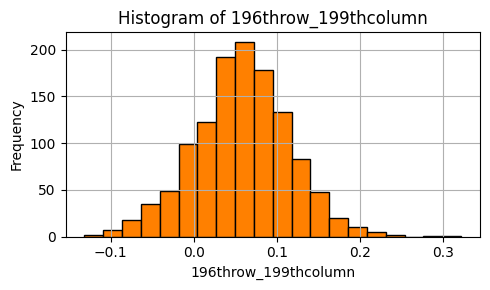

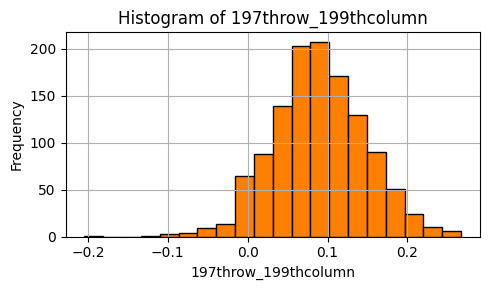

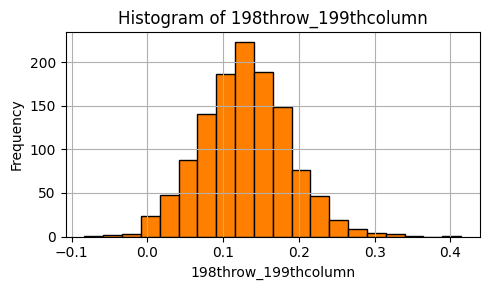

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numerical_columns = [
    '196throw_197thcolumn', '196throw_198thcolumn', '196throw_199thcolumn', '197throw_199thcolumn', '198throw_199thcolumn'
]

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    train_functional[column].hist(bins=20, color='#FF8000', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [35]:
from sklearn.decomposition import PCA

X_highdim = train_functional.drop(columns=['participant_id'])

pca = PCA(n_components=1000)  # Adjust components as needed
X_pca = pca.fit_transform(X_highdim)

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")


Explained Variance Ratio: 0.8989287154539148


In [40]:
print(f"Shape of PCA-transformed data: {X_pca.shape}")

Shape of PCA-transformed data: (1213, 1000)


In [43]:
import pandas as pd

# Convert to DataFrame with column names like 'PC1', 'PC2', ..., 'PC1000'
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])  

In [42]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
0,0.098671,0.161766,-0.168615,0.012867,0.255717,-0.103280,-0.049778,-0.067093,0.264832,-0.098802,...,0.123044,0.179540,-0.061980,-0.074137,0.093798,0.202244,0.012554,-0.049060,0.289214,0.176828
1,0.437470,0.495804,-0.018796,0.018182,0.151769,-0.118468,0.157985,-0.026742,0.034691,-0.036173,...,0.040073,-0.048531,0.063543,0.173175,0.176832,0.068452,-0.020075,-0.044510,0.104782,0.036072
2,0.041330,0.585298,0.181564,0.061549,0.075908,-0.017260,-0.076878,0.164383,-0.096225,-0.096506,...,-0.068290,-0.073117,0.089887,-0.128481,-0.305934,0.116198,-0.159633,0.021756,0.293703,-0.077827
3,-0.149834,-0.527528,-0.032539,-0.022992,0.043623,-0.167571,-0.095505,0.068575,0.029254,-0.070238,...,-0.143036,-0.001616,0.268506,-0.275361,0.280111,-0.015314,0.009261,-0.239073,-0.046501,-0.016638
4,0.486916,-0.016741,0.227893,0.003209,0.142476,-0.197946,-0.178693,0.070241,0.052145,0.078861,...,-0.090037,-0.012356,-0.075833,0.017693,-0.122924,-0.028643,0.152750,-0.125426,0.002945,-0.144615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.175920,0.162410,0.213668,-0.137778,0.115046,-0.020817,-0.028248,0.040631,-0.071422,-0.072554,...,-0.127521,0.016583,-0.089262,-0.156880,-0.089813,0.063062,0.143766,0.008700,0.256062,-0.158843
1209,0.058448,0.313266,0.386325,-0.312211,-0.226819,0.184463,-0.205530,0.005014,-0.008944,-0.182225,...,0.046197,0.058953,-0.136120,0.147179,-0.004448,0.041453,-0.011097,-0.002015,-0.017886,0.060414
1210,0.281735,-0.253537,0.146451,0.210093,0.217934,-0.132916,-0.389030,-0.094493,0.276170,0.168283,...,0.080847,-0.076863,0.091547,-0.054814,0.107067,-0.078998,0.009083,-0.149344,-0.011835,-0.035241
1211,-0.038008,-0.140744,-0.569584,-0.261864,-0.157777,0.091484,-0.060971,-0.314583,0.164663,-0.062722,...,-0.062069,-0.036160,-0.018734,0.049061,0.086711,0.067111,0.147890,0.005591,0.059462,-0.038360
